<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Maor, my name is Dmitrii. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Once again you achieved a very high level of the project! 

Nevertheless, there are some comments/areas that will help you to make your project even better and should be fixed before this project can be accepted:
- Evaluate the data period that we actually need to check the latest platform generation.
- Check outliers using boxplot in the mean sales per genre. 
- Add 'unknown' rating to the region profile.
 
Of course, it will be amazing if you have time to check also yellow comments :)
I will wait for the new version of the project. Come back soon! 

And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hello Maor, thank you for going an extra mile and making changes in your project.

There are only 2 minor things to change before this project could be accepted: 
    
- Keep only recent data (from 2013/2014 onwards). Sorry to push this solution, but I truly believe that this could help to incorporate only recent trends in this market, which is crucial in forecasting.</br>
- Fill missing values in the rating column with 'unknown' placeholder, so it will be visible in the region profile. 
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.    

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v3:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with additional improvements. 
- Now everything is perfect. No critial issues left, so your project has been accepted! 
- Wish you cool projects in the next sprints! ☘️
    

</div>

# Which games sells the most?

This project has been done for an online store named "Ice" which sells video games around the world.
The purpose of this study is to identify patterns that will indicate the success of one game or another, and later to plan an advertising campaign based on the results of the analysis.
The data goes back to 2016, but for the learning and experimenting, we will imagine that we are planning a campaign for the following year, 2017.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal. Could be also helpful to share steps you will complete.

</div>

In [114]:
# importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats as st
import datetime as dt
import math
from functools import reduce
import random
import re
import seaborn as sns

In [115]:
try:
    gaming=pd.read_csv('/datasets/games.csv')
except:
    gaming=pd.read_csv('/Downloads/games.csv', sep='\t')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
I can advice to always use `try-except statement for the data loading.

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

Hello, Dmitrii!
    
Thank you for taking the time to review my project.
I reviewed your useful comments and made the necessary changes.

With a try-except statement, I added a code block for uploading the data here.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>

Thanks for adding! It really helps sometimes to avoid errors in your code.


In [116]:
# checking the size of the table
gaming.shape

(16715, 11)

In [117]:
# first glimpse of the data

# By looking at the info() function, I can see the number of rows (n1=16,715) and the total number of columns (n2=11).
# Name and Genre are missing two rows - there could be a connection between the two.
# Some data types have nothing to do with the variable Measuring scale.
gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [118]:
# checking which columns has missing values
for i in gaming:
    if gaming[i].isnull().sum()>0:
        print(i)

Name
Year_of_Release
Genre
Critic_Score
User_Score
Rating


In [119]:
# cheking the sum() of missing values
gaming.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [120]:
# Percentage of missing values:
gaming.isnull().sum()/ gaming.shape[0] * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you checked not only the total amount of missing values in each column but also looked at the percentage of missing values. 
    
Btw you can easily create a dataframe from this using the following code: 
    
    (gaming.isnull().sum()/ gaming.shape[0] * 100).to_frame()

In [121]:
# lower case for columns names
gaming.columns=gaming.columns.str.lower()
gaming.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [122]:
gaming[gaming.rating.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [123]:
gaming['rating'] = gaming['rating'].fillna('unknown')
gaming['rating'].isnull().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

</div>

In [124]:
# some basic samples by using 'head()','tail()' and 'sample()'
gaming.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


In [125]:
gaming.tail(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,unknown
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,unknown


In [126]:
gaming.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6469,Etrian Odyssey Untold: The Millennium Girl,3DS,2013.0,Role-Playing,0.10,0.01,0.14,0.01,80.0,8.2,T
14207,Duke Nukem 3D: 20th Anniversary World Tour,PS4,2016.0,Shooter,0.03,0.00,0.00,0.01,77.0,6.9,M
1978,EA Sports UFC,PS4,2014.0,Sports,0.46,0.41,0.01,0.17,70.0,6.1,T


In [127]:
# checking dispersion & central location indices
gaming.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [128]:
#checking categorical variables
gaming.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,16715
unique,11559,31,12,96,9
top,Need for Speed: Most Wanted,PS2,Action,tbd,unknown
freq,12,2161,3369,2424,6766


In [129]:
gaming[gaming.user_score=='tbd']['year_of_release']

119      2010.0
301      2005.0
520      2011.0
645      2010.0
657         NaN
          ...  
16695    2001.0
16697    2003.0
16698    2008.0
16704    2008.0
16706    2003.0
Name: year_of_release, Length: 2424, dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! 👍

# Step 2: preparing the data:

In [130]:
gaming.rating.value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

In [131]:
# An attemp to restore rating's missing values

# It is worth noting that the ESRB was established in 1994.
# If I'm correct, some games released prior to this year will be missing from the rating column.
# It can be seen that there are 363 missing cells in the rating column for games released prior to 1994.
# As a result, my efforts to recover missing entries in this column will be visible in games released since 1994.
gaming.query('year_of_release<1994').isnull().sum()

name                 2
platform             0
year_of_release      0
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       364
user_score         364
rating               0
dtype: int64

In [132]:
gaming[(gaming['year_of_release'])>=1994&(gaming.rating.isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


In [133]:
gaming[gaming.rating.isnull()]

# gaming.query('name=="Mario Kart Wii"')
# gaming.query('name=="LMA Manager 2007"')
# gaming.query('name=="Pokemon Red/Pokemon Blue"&year_of_release==1996')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Many queries were used to check the compatibility of "name" with "year of release" in order to recover missing values in the 'rating' column. For example, if "Mortal Combat" was released in 2000 and had a value in rating column, I could fill in the missing entries in additional lines.
Unfortunately, this attempt was a failure. I found no clues to help me fill in the blanks in the queries I ran.

In [134]:
# converting "user_score" data-type from "object" to "float64"
## Values in the user_score column have a decimal point where 10 is the maximum value.
### It is necessary to change the type of data.

try:
    gaming['user_score']=pd.to_numeric(gaming['user_score'], errors='coerce')
    print(gaming['user_score'].dtypes)
except:
    print('try harder')

float64


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Totally agree with your conclusions about user_score.

### Restoring yaer_of_release values (as much as possible):

In [135]:
def get_year(row):
    """
    Pull year numbers from 'name' column.
    
    Parameters:
    parameter1: row
    
    return: int
    """
    regex="\d{4}"
    match=re.findall(regex, row)
    
    for i in match:
        if (int(i) > 1970) & (int(i) < 2017):
            return int(i)

In [136]:
# Applying the function to the year_of_release column
gaming['years_from_titles']=gaming['name'].apply(lambda x: get_year(str(x)))

In [137]:
# Another function to replace NaN values in year_of_release based condition of row matching:
def year_row(row):
    if row['year_of_release'] != row['year_of_release']:
        return row['years_from_titles']
    else:
        return row['year_of_release']

gaming['year_of_release']=gaming.apply(year_row,axis=1)

In [138]:
# Now after running the functions and in order
# to avoid errors that are related to the data-type, I change the data type in the year_of_release column from "float64"
# to "int64"
gaming['year_of_release'] = gaming['year_of_release'].astype(float).astype('Int64')

In [139]:
# Meanwhile, 17 missing values(year_of_release) had been filled by the functions I created.
gaming.isnull().sum()

name                     2
platform                 0
year_of_release        252
genre                    2
na_sales                 0
eu_sales                 0
jp_sales                 0
other_sales              0
critic_score          8578
user_score            9125
rating                   0
years_from_titles    15883
dtype: int64

In [140]:
# Multiple queries in order to manually fill in some missing values:

 ## The logic behind performing the queries is that if an identified game
 ## appears near an identified year & across multiple platforms - it can be completed in the other rows where it is missing.


 ### Succesfull attempts:

# The game "inversion" was released in 2012 across severel platforms.
# gaming.query('name=="Inversion"')
gaming.loc[[16448], ['year_of_release']] = gaming.loc[[16448], ['year_of_release']].fillna(2012)
gaming.loc[[16448], ['year_of_release']]

# "Freaky Flyers" was released across number of platforms in year 2003.
# Therefore, the missing values can be filled with a value of "2003":

# gaming.query('name=="Freaky Flyers"')
gaming.loc[[16405], ['year_of_release']] = gaming.loc[[16405], ['year_of_release']].fillna(2003)

# "LEGO Batman: The Videogame" was released across number of platforms in year 2008.
# the missing values can be filled with a value of "2008":

# gaming.query('name=="LEGO Batman: The Videogame"')
gaming.loc[[1538], ['year_of_release']] = gaming.loc[[1538], ['year_of_release']].fillna(2008)
gaming.loc[[456], ['year_of_release']] = gaming.loc[[456], ['year_of_release']].fillna(2008)

# "Brothers in Arms: Furious 4" was released across number of platforms in year 2012.
# the missing values can be filled with a value of "2012":

# gaming.query('name=="Brothers in Arms: Furious 4"')
gaming.loc[[16329], ['year_of_release']] = gaming.loc[[16329], ['year_of_release']].fillna(2012)

# restoring "Call of Duty 3" year of release:

# gaming.query('name=="Call of Duty 3"')
gaming.loc[[719], ['year_of_release']] = gaming.loc[[719], ['year_of_release']].fillna(2006)

# Restoring "LEGO Indiana Jones: The Original Adventures" year of release:

gaming.loc[[678], ['year_of_release']] = gaming.loc[[678], ['year_of_release']].fillna(2008)

# Restoring "Call of Duty: Black Ops" year of release:
gaming.loc[[1131], ['year_of_release']] = gaming.loc[[1131], ['year_of_release']].fillna(2010)
#Restoring "Triple Play 99" year of release:
gaming.loc[[1301], ['year_of_release']] = gaming.loc[[1301], ['year_of_release']].fillna(1999)

# Restoring "LEGO Harry Potter: Years 5-7": 7(!) missing years which can all be filled by the year "2012":

# At first, I wrote a condition-based function that replaces the missing lines.
# But the function failed and mistakenly identify the type of data as a "Timestamp".
# Therefore, I preferred to use the "eq()" method:

m1 = gaming['name'].eq('LEGO Harry Potter: Years 5-7')
m2 = gaming['year_of_release'].isna()
gaming.loc[m1 & m2 , 'year_of_release'] = 2012

# Restoring "Rhythm Heaven" year of release (2008)
gaming.loc[[2361], ['year_of_release']] = gaming.loc[[2361], ['year_of_release']].fillna(2008)

# Restoring "The Lord of the Rings: War in the North" year of release (2011):

gaming.loc[[2453], ['year_of_release']] = gaming.loc[[2453], ['year_of_release']].fillna(2011)
gaming.loc[[2522], ['year_of_release']] = gaming.loc[[2522], ['year_of_release']].fillna(2011)

# Restoring "Shaun White Snowboarding" year of release (2008):
gaming.loc[[2536], ['year_of_release']] = gaming.loc[[2536], ['year_of_release']].fillna(2008)

# Restoring "Madden NFL 11" year of release (2010):
gaming.loc[[2849], ['year_of_release']] = gaming.loc[[2849], ['year_of_release']].fillna(2010)

In [141]:
# I've managed to fill in a total of 38 values:
gaming.year_of_release.isnull().sum()

231

In [142]:
### checking "name" missing values

#print(gaming.name.isnull().sum())
#gaming[gaming.name.isnull()]

#missing_names_and_genre_1993=gaming[(gaming['platform']=='GEN')&(gaming['year_of_release']=='1993-01-01')]
#missing_names_and_genre_1993

gaming['name']=gaming['name'].fillna('Unknown')
print(gaming['name'].isnull().sum())

0


In [143]:
### checking "genre" missing values

#print(gaming.genre.isnull().sum())
#gaming[gaming.genre.isnull()]

gaming['genre']=gaming['genre'].fillna('Unknown')
print(gaming['genre'].isnull().sum())

0


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
   
    
You did a great job of restoring missing values. Regarding the rating column, the unknown value contains valuable information in itself, so indeed any placeholder could be indeed used to fill it.
    


In [144]:
# Here we can see the total sales of the 'Unknown' names & gener's : $2.42 milion.
print(gaming.query('name=="Unknown"').sum())

name                 UnknownUnknown
platform                     GENGEN
year_of_release                3986
genre                UnknownUnknown
na_sales                       1.78
eu_sales                       0.53
jp_sales                       0.03
other_sales                    0.08
critic_score                    0.0
user_score                      0.0
rating               unknownunknown
years_from_titles               0.0
dtype: object


In [145]:
# This line of code's purpose is to check the tbd's after changing the data type.
# As I intended, they became NaN.
gaming.user_score.value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [146]:
# The perpose of this line of code is to check how python treated the tbd's after changing the data type
## row 4594- [user score] - was tbd , now it's NaN , as i intended to be.
gaming.iloc[4594]

name                 Just Dance: Summer Party
platform                                  Wii
year_of_release                          2011
genre                                    Misc
na_sales                                  0.4
eu_sales                                  0.0
jp_sales                                  0.0
other_sales                              0.02
critic_score                              NaN
user_score                                NaN
rating                                   E10+
years_from_titles                         NaN
Name: 4594, dtype: object

# Creating total sales column

In [147]:
gaming['total_sales']=gaming[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
gaming.sample(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_from_titles,total_sales
8382,State of Emergency,XB,2003,Action,0.13,0.04,0.0,0.01,67.0,6.3,M,NaN,0.18
11694,"Ni Hao, Kai-lan: Super Game Day",PS2,2009,Misc,0.04,0.03,0.0,0.01,NaN,NaN,E,NaN,0.08
3952,Cars Toon: Mater's Tall Tales,Wii,2010,Misc,0.45,0.02,0.0,0.03,NaN,NaN,E,NaN,0.50
12132,Goodbye Deponia,PC,2013,Adventure,0.00,0.06,0.0,0.00,80.0,7.9,unknown,NaN,0.06


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>

However, I can recommend to use `.sample`, `.head` or `.tail` to show only part of the dataframe. 


<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

I agree with the comment; showing a sample of the data is much more convenient for the reader.
I changed the code and added: sample (4).

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>

🙌

# ## Step 2 Summary:

#### 1. Lowering case for column names.


#### 2. user_score data-type:

   The user_score variable has a ratio scale. This can be seen when we check user_score.value_counts (): these are decimal        numbers. Therefore, the type of data in this column should be changed from "Object" to "float64".
   
   
#### 3. Restoring "year_of_release" as much as possible:
   
   Possible explanations for missing entries in this column include data collection methods. We are aware that the data is   
   incomplete and missing.
   
   Some of the information may have been missing in advance, or it is possible that for some of the lines there was profit   
   information but the information for the year of publication was missing, but this is irrelevant to the analysis.
   
   It is important to notify the department in charge of the missing data, but we can continue the analysis and fill in any  
   missing entries as much as possible.
   
   2 functions were created to fill in (17) missing values.

   One "pulled" the missing years that had appeared next to some of the game names in the "Name" column. Additional column        'years_from_titles' had to be created.

   The second, filled in the missing years based on a condition of matching between the "name" lines and the "year of release"    lines.
   
   Additional 21 values were filled manully by using 'query()', '.loc[]', 'fillna()' & 'eq()'.
   
   Most of the unfulfilled entries appear once or alternatively; missing on all platforms in a way that makes it impossible        to know their year of release.

#### 4. Filling missing values in "name" column:

   I spotted 2 missing values in the "name" column. they were unique to year '1993' and for a platform named "GEN". 7 games had    sold in 1993 and were identified with "GEN" , each of these games had sold once that year.
 
   Replacing missing values by one of the games' names would have distort their distribution.
   while they share a zero or NaN values of sales, the missing lines sum up a global sales of $ 2.42 million.

   in order to avoid skewing the data for one of the games, in a way that would show as if it gained revenues on 1993, missing    values were replaced with a value of: "unknown".

   The pattern of the missing values in the 'Name' column is symetric to those on the 'Genre' column. Logically speaking, the 2    columns seems related to each other. If we do not know the name of the game, how can we know which genre it belongs to?
   Also, in this case, missing values have been replaced with an "unknown" value.
   
#### 5.TBD'S

   In the 'ranking' jargon, tbd stands for "to be defined".
   
   Games that have yet to receive a rank are most likely in an intermediate state known as TBD.
   At first, I assumed it was simply new games.
   
   However, after examining the frequency of TBD over the year of release, I discovered that the occurrence of TBD was    
   consistent across all years. They do not show a unique pattern for certain years.
   
   This is equivalent to a missing value in my opinion. As a result, the tbd values were replaced with NaNs after changing the    data type in the user score column from "object" to "float."

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Great, everything is correct here. 


# step 3: analyzing the data

In [148]:
# disregarding missing values \ creating a copy wothout missing values:
gaming_nomissing = gaming[(gaming['year_of_release'] != 0)]

In [149]:
# The number of games per year:
games_per_year=gaming_nomissing[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
games_per_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [150]:
# Here, I'm looking at the mean value of the number of games, which will help me draw a threshold line on the next step.
games_per_year.mean()

year_of_release    1998.000000
name                445.513514
dtype: float64

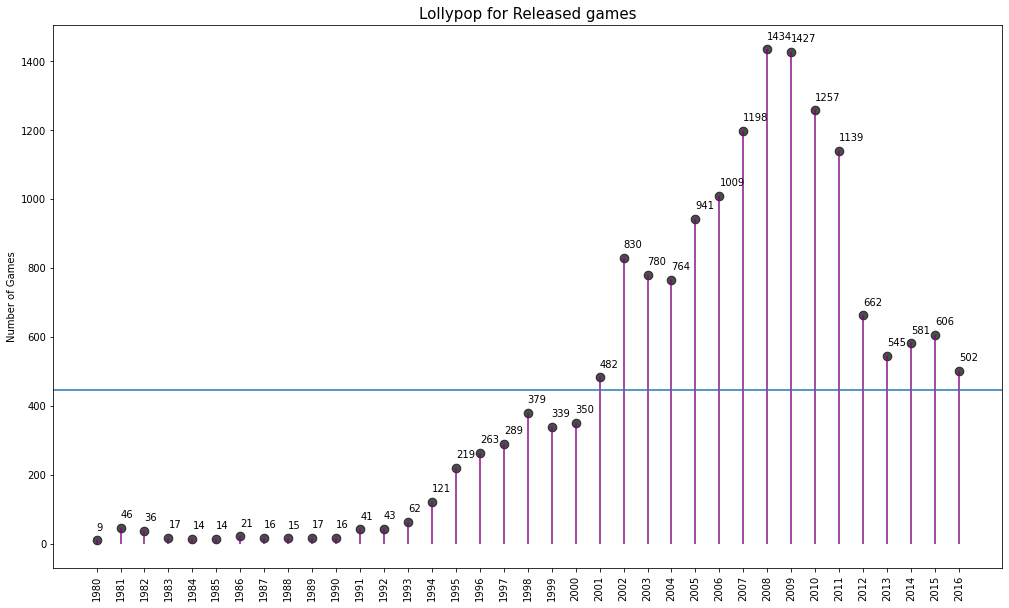

In [151]:
# I've made a Lollipop graph that illustrates the distribution of the number of games released each year.
# The threshold represents the average number of games released each year (= 445.51).

fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=games_per_year.year_of_release, ymin=0, ymax=games_per_year.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=games_per_year.year_of_release,y=games_per_year.name, s=75, color='black', alpha=0.7)

ax.set_title("Lollypop for Released games", fontdict={'size':15})
ax.set_ylabel("Number of Games")
ax.set_xticks(games_per_year.year_of_release)
ax.set_xticklabels(games_per_year.year_of_release,rotation=90)
# plotting a horizontal line 
ax.axhline(y=445.5135)

for row in games_per_year.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))

Data on the number of games published each year are only significant for 2001 and beyond.
It can be seen that the number of games published from 2001 onwards increases steadily until 2008.
The years 2008-2009 were the most successful years in terms of the number of games released.
On the other hand, a decline in the number of games put on the market can be observed from 2009 onwards, with 2016 showing the lowest number of games released since 2002.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1995.



#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [152]:
df=gaming_nomissing[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
df

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


In [153]:
# here, i'm creating z-score column
df['sales_z']=(df['total_sales']-df['total_sales'].mean())/df['total_sales'].std()

In [154]:
# the leading platforms in sales deviate strongly from the mean value.
# In contrast, the least successful platforms in terms of sales approach almost one standard deviation in their sales.
# If we look at the Z-scores, we can understand that the data is skewed to the right.

df['color']=['red' if x<0 else 'green' for x in df['sales_z']]
df

,platform,total_sales,sales_z,color
0,PCFX,0.03,-0.825021,red
1,GG,0.04,-0.824992,red
2,3DO,0.10,-0.824818,red
3,TG16,0.16,-0.824645,red
4,WS,1.42,-0.821005,red
5,NG,1.44,-0.820947,red
6,SCD,1.86,-0.819734,red
7,DC,15.95,-0.779029,red
8,GEN,30.77,-0.736215,red
9,SAT,33.59,-0.728068,red


# Conclusion

 We can see how far each platform is from the average in terms of total sales by looking at the z-scores.
 
 The least profitable platforms are nearly a point below average (DCFX, GG, 3DO, TG16 ..).\
 
 On the other hand, the most successful platforms (PS2, X360, PSS, Wii, DS, and PS) are significantly above the mean (more than  
 a point, if not  two points)
 
 That is, the leading platforms are very distinct from the average, so it is understandable that the data is distorted to the    
 right, where the tail of the curve is.

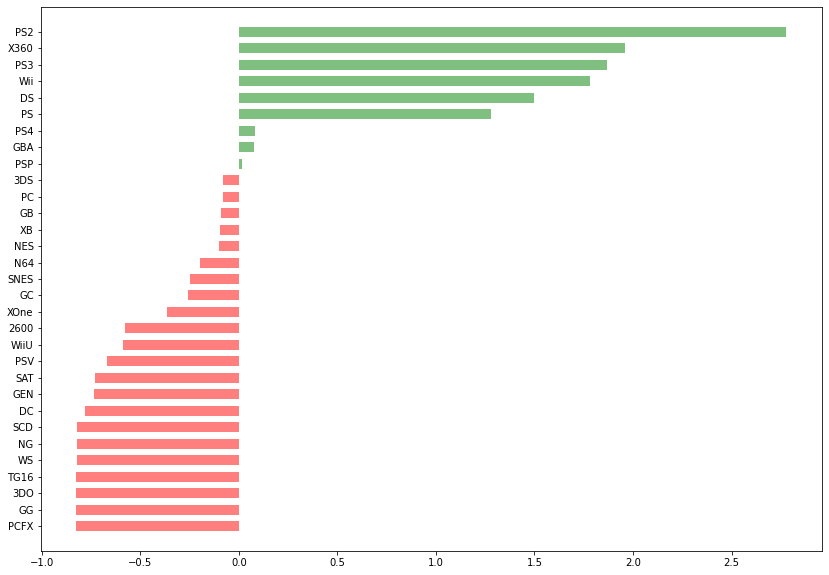

In [155]:
# Here I demonstrate the variability of each platform above/below average using a diversion bar-plot.

plt.figure(figsize=(14,10))
plt.hlines(y=df.platform,xmax=df.sales_z, xmin=0,color=df.color, alpha=0.5, linewidth=10)

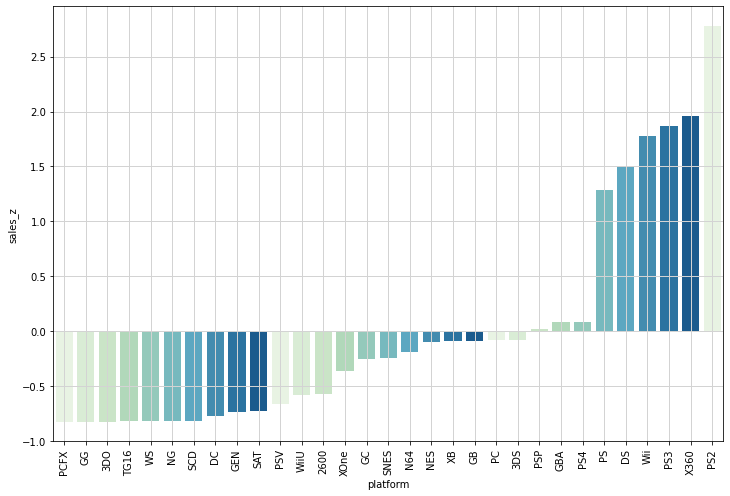

In [156]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.platform, y=df.sales_z, data=df, palette=sns.color_palette("GnBu", 10), order=df['platform'])
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Nice graph to show how sales deviates from the average, but I would say it will be better to show it together with the regular sorted barchart.

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

Hello Dmitrii,

I'd added another regular and soreted bar plot.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>

I actually meant bar plot in absolute values with sales per platform, but that one looks also very cool 😇

#### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [44]:
# The first masking of data from 2007 was used to demonstrate patterns from the previous decade.
df=gaming_nomissing[gaming_nomissing.year_of_release>=2007]

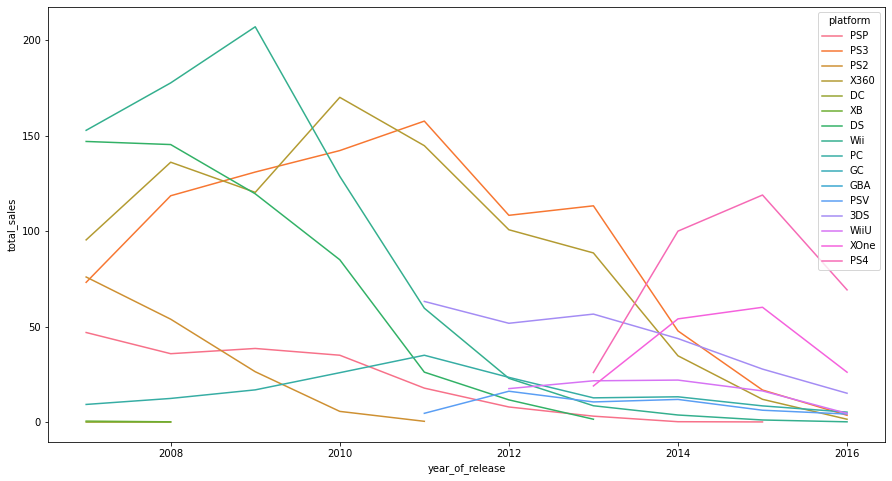

In [45]:
df=df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df, x='year_of_release', y='total_sales', hue='platform')

In [46]:
df=df.groupby(['platform'])['year_of_release'].agg(['min','max'])

In [47]:
df['age']=df['max']-df['min']
df=df.reset_index()
df.sort_values(by='max')

,platform,min,max,age
3,GBA,2007,2007,0
4,GC,2007,2007,0
1,DC,2007,2008,1
14,XB,2007,2008,1
6,PS2,2007,2011,4
2,DS,2007,2013,6
9,PSP,2007,2015,8
0,3DS,2011,2016,5
5,PC,2007,2016,9
7,PS3,2007,2016,9


In [48]:
df['age'].mean()

4.75

# The platform life span

Platforms that were popular in the past but are no longer sold include: GBA, DS, GC, XB, PS2, DC & PSP.

The life span of a platform is on average 4.75 years

The latest platforms that are still sold today are: XOne & PS4.

The oldest platforms that are still sold today are: X360, Wii, PS3 & PC.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
That is a nice way to check platform life cycle.

We can see that only a small subset of platform still has sales.

In [49]:
# Secondary masking of 2011 data to reflect the average time it takes for a platform to vanish
# (i round it up from 4.75 to 5 years)

df_new=gaming_nomissing[gaming_nomissing.year_of_release>=2014]
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,years_from_titles,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,NaN,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,NaN,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,2015.0,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Great that you used only recent sales data and platforms; however, looking at your conclusions about the platform cycle and the fact that we need to make a prediction for 2017 I would keep the period even shorter. 
    

What are your thoughts about this?

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

For 2012 and later, I masked the data. That is, I rounded down the average time it takes for a platform to die to four years.

<div class="alert alert-danger">
<b>Reviewer's comment v2:</b>
    
Thank you for sharing, your solution is clear. However, I would suggest keeping only data after 2014 so that we will have only the latest platform generation (well not the latest anymore).
    

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

ok, so now i'd masked the data for 2014 and later.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3</b>
 
🙌

#### Which platform are leading in sales? Which one are growing or shrinking? select severel potentionally profitable platforms.

In [50]:
df=pd.pivot_table(df_new, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
df.tail(6)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


#### Which one are growing or shrinking?

In [51]:
# transposing the data 
dynamics=(df-df.shift(+1)).T
dynamics

year_of_release,2014,2015,2016
platform,,,
3DS,NaN,-15.98,-12.64
PC,NaN,-4.76,-3.27
PS3,NaN,-30.94,-13.22
PS4,NaN,18.90,-49.65
PSP,NaN,-0.12,-0.12
PSV,NaN,-5.65,-2.00
Wii,NaN,-2.61,-0.96
WiiU,NaN,-5.68,-11.75
X360,NaN,-22.78,-10.44


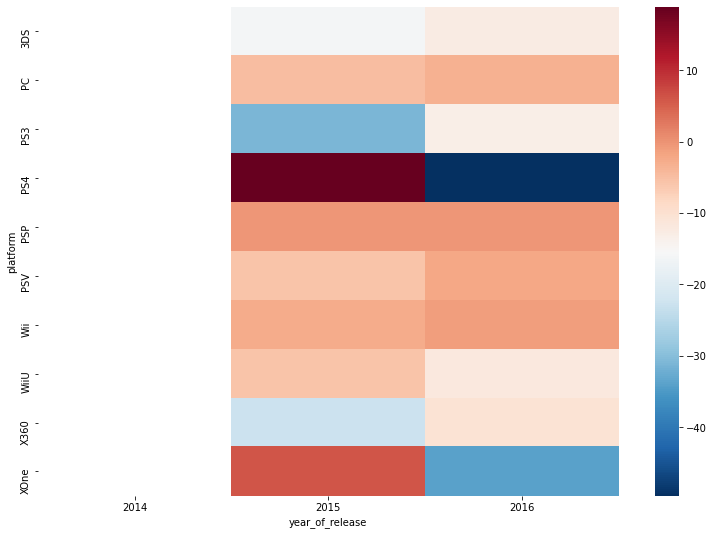

In [52]:
# This heatmap would illustrate an increase or decrease in sales.
# Blue scale = loose or mid-range revenues 
# White scale = no increase & no decrease
# Increase in revenue = red range.
# As far as we can tell, there is no platform that will show an increase in sales by the end of 2016.
## Take note of the PS4's significant sales year in 2014.
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r')
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
In order not to show auxiliary python outputs like "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90 ', you can add a semicolon or plt.show () at the end of the line.

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

Indeed, I used it on previous projects, but I must have forgotten about it at this time.
added.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Now it is neat and clean.

# conclusion

All of the platforms surveyed between 2014 and 2016 appear to be experiencing a decrease in total revenue.

## 3DS

The 3DS's revenue continues to fall.
The year 2016 ends with a loss of $12.64 million dollars for 3DS.
Although this is a small decrease from the previous year, we do not see growth in 3DS revenues, which may be signs of shrinkage.

## XOne

XOne's revenue dropped dramatically at the end of 2016, with a $34 million loss.
At the same time, given that its profits increased the previous year, I would not rush to label it as a shrinking platform.

## PS4

Already since its release in 2013, the PS4 has seen a significant increase in revenue for three years in a row. In 2014, PS4 revenue increased by 74 million over the previous year.
Simultaneously, the end of 2016 PS4 concludes with a sharp drop and a revenue loss of 50 million compared to the previous year.

Given the PS4's successful sales in 2014, it's a little early to herald it as a shrinking platform.
Furthermore, the PS4 has been profitable for the past five years. The PS4's revenue has dropped for the first time in 2016.
The lack of data cautions against jumping to conclusions about the PS4. We must wait for updated data or data from future years. But, in the end, I wouldn't rush to define the PS4 as a shrinking platform.
Furthermore, the heatmap demonstrates the PS4's significant success in 2016 across the other platforms.

## PSP

PSP's revenue has been steadily declining since 2012.
Among the platforms tested, PSP has the lowest revenue loss (-0.12).
This appears to be a platform that is losing market share.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great way to visualize this. As a second approach, you can also create line plots for selected platforms.

In [53]:
grouped=df_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05
...,...,...,...
1684,XOne,Wolfenstein: The Old Blood,0.15
1685,XOne,Worms: WMD,0.01
1686,XOne,XCOM 2,0.04
1687,XOne,ZombiU,0.01


In [54]:
order=grouped.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order

4     PSP
6     Wii
5     PSV
1      PC
7    WiiU
8    X360
2     PS3
0     3DS
9    XOne
3     PS4
Name: platform, dtype: object

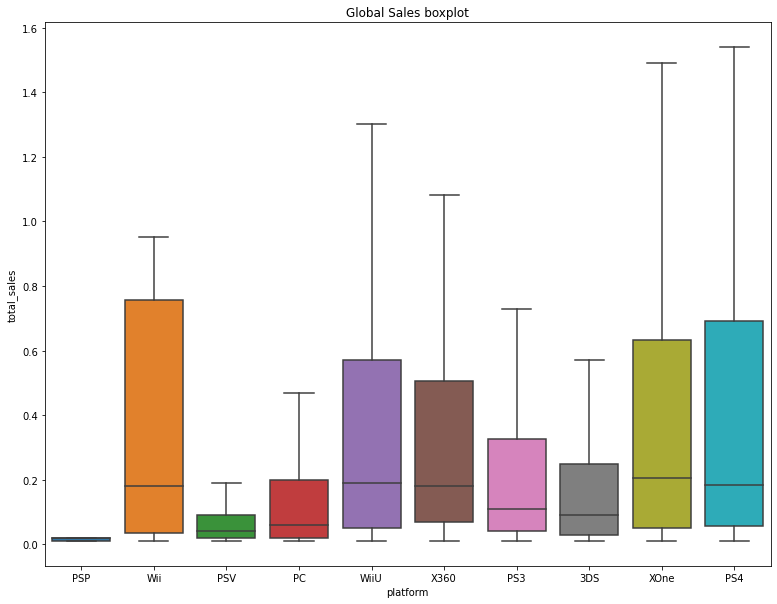

In [55]:
# box plot for the global sales of all games, broken down by platform
# showflires = False to disregard outliers.
plt.figure(figsize=(13,10))
boxplots=sns.boxplot(x='platform',y='total_sales',data=grouped,order=order,showfliers = False)
boxplots.set_title('Global Sales boxplot')
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Well done! I really like your boxplot and that you already excluded outliers. 
    
Adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

Thank you; I've added a title.
Also, I rephrased my conclusion regarding the difference between the averages.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
🙌

# Conclusion

When the data with outlires is examined, it is clear that they play a significant role in inflating the data for the leading platforms.

When we look at the data cleaning outliers, we see that the leading platforms are still the XOne, PS4, X360,Wii and WiiU.
The average sales for the PS4, WiiU, Wii, and X360 are nearly identical, with XOne sales slightly higher.

In [56]:
df_new.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,years_from_titles,total_sales
year_of_release,1.000000,-0.122977,-0.093408,-0.056134,-0.096834,0.071818,0.013853,0.761279,-0.117482
na_sales,-0.122977,1.000000,0.735920,0.264362,0.841484,0.333306,-0.028258,-0.026531,0.913660
eu_sales,-0.093408,0.735920,1.000000,0.188675,0.930140,0.270826,-0.040985,-0.004615,0.915583
jp_sales,-0.056134,0.264362,0.188675,1.000000,0.170780,0.130316,0.184141,0.050756,0.418281
other_sales,-0.096834,0.841484,0.930140,0.170780,1.000000,0.289985,-0.030056,-0.019213,0.935091
critic_score,0.071818,0.333306,0.270826,0.130316,0.289985,1.000000,0.504460,0.334913,0.328105
user_score,0.013853,-0.028258,-0.040985,0.184141,-0.030056,0.504460,1.000000,0.186044,-0.013070
years_from_titles,0.761279,-0.026531,-0.004615,0.050756,-0.019213,0.334913,0.186044,1.000000,-0.012660
total_sales,-0.117482,0.913660,0.915583,0.418281,0.935091,0.328105,-0.013070,-0.012660,1.000000


In [57]:
# To determine the Pearson correlation between two variables,
# I developed a custome function. The platform's name (E.g: "XOne") and the type of ranks (E.g: "critic_score") 
# are the two expressions that the function takes as input.

def corfunc2(Platform, score_type):
    """
    This function check Pearson correlation between two variables.
    
    parameters:
    argument1(str): name of a platfom
    argument2(str): name of score type
    
    return: Pearson correlation between Parameter1 & Parameter2.
    """
    df5 = df_new[(df_new.platform==Platform)&(df_new[score_type].notna())][['total_sales',score_type]]
    df5.plot(x=score_type, y='total_sales', cmap='viridis', kind='hexbin', gridsize=20, sharex=False, alpha=1)
    correlation = df5[score_type].corr(df5["total_sales"], method='pearson')


    if (correlation > .7).any(axis=None):
        result=print(correlation)
        print('There is a strong positive connection')
    elif (correlation < -0.7).any(axis=None):
        result=print(correlation)
        print('There is a strong negative connection:')
    elif (.3 < correlation < .7).any(axis=None):
        result=print(correlation)
        print('There is a moderate positive connection')
    elif (-.3 > correlation > -.7).any(axis=None):
        result=print(correlation)
        print('There is a moderate negative connecion')
    else:
        result=print('weak connection')
        print(correlation)
    print(result)

In [58]:
print(corfunc2.__doc__)


    This function check Pearson correlation between two variables.
    
    parameters:
    argument1(str): name of a platfom
    argument2(str): name of score type
    
    return: Pearson correlation between Parameter1 & Parameter2.
    


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great that you managed to create a function to automate your code, but only minor remark about how documenting functions.

There is a common convention to use docstrings to comments functions in python. It helps to keep code clean and embrace transparency and readability when multiple teams are working on the same complex code.

You can read about this, for example, here: https://www.datacamp.com/community/tutorials/docstrings-python

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>
    
This comment means a lot to me.
I was unfamiliar with "__doc__." ,and I'm always eager to learn new work techniques and concepts.

I added a function description. now by using: doc__. It will be possible to obtain information about the function.
I hope I understood your comment and updated accordingly; if not, I will need to learn more about the use of docstring and apply it in future projects.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Yes, exactly. It looks great, and it is a nice feature to remind yourself or colleagues about the purpose of each function.

In [59]:
df_new.query('platform=="Wii"').sum()

name                 Just Dance 2015Just Dance 2016Skylanders: Trap...
platform                             WiiWiiWiiWiiWiiWiiWiiWiiWiiWiiWii
year_of_release                                                  22160
genre                MiscMiscActionSportsAdventureMiscActionActionA...
na_sales                                                          2.08
eu_sales                                                          2.59
jp_sales                                                           0.0
other_sales                                                        0.4
critic_score                                                       0.0
user_score                                                        12.7
rating                          E10+E10+E10+EE10+E10+unknownunknownEEE
years_from_titles                                               4031.0
total_sales                                                       5.07
dtype: object

In [60]:
platform=['WiiU','X360','PS4','XOne']
col=['critic_score','user_score']

WiiU critic_score
0.370201412480884
There is a moderate positive connection
None
WiiU user_score
0.40792645792170773
There is a moderate positive connection
None
X360 critic_score
0.5257228356581523
There is a moderate positive connection
None
X360 user_score
weak connection
-0.138444570945665
None
PS4 critic_score
0.40266141068104083
There is a moderate positive connection
None
PS4 user_score
weak connection
-0.040131589472697356
None
XOne critic_score
0.42867694370333226
There is a moderate positive connection
None
XOne user_score
weak connection
-0.0703839280647581
None


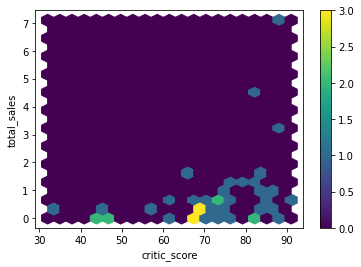

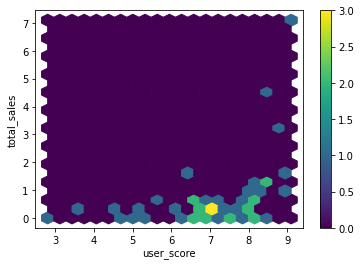

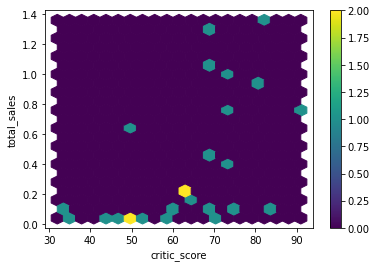

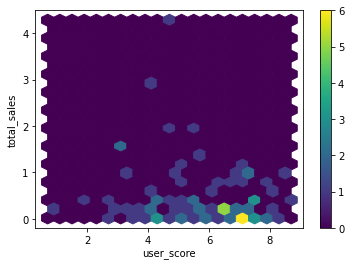

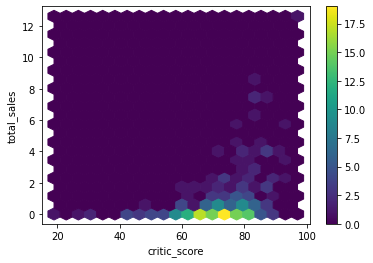

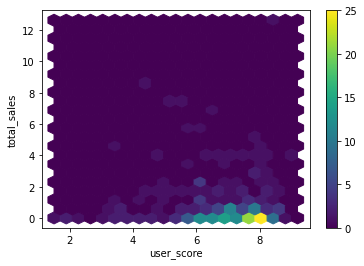

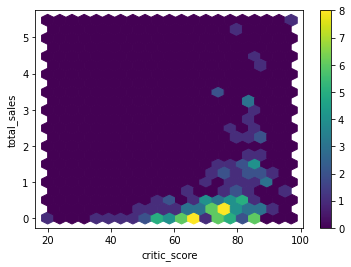

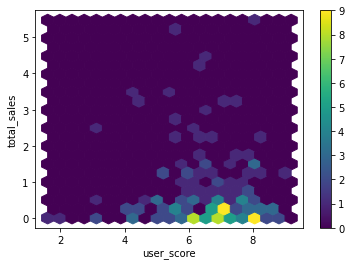

In [61]:
cor_df=[]
for i in platform:
    for x in col:
        print(i,x)
        cor_df.append([i,x,corfunc2(i,x)])

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

I excluded Wii from the function's loop because it is the only platform with a critic score column sum of zero (and therefore, generate error while running the function).
Instead, I'll only look at the Wii and user score correlation.

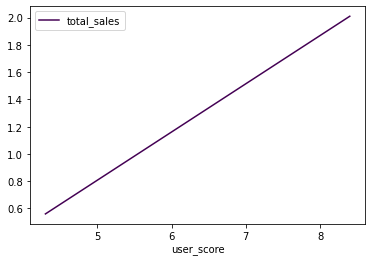

In [62]:
# In this section, I investigate the relationship between Wii sales and user score.
# I added another visualization to show the full & positive relation.

df6 = df_new[(df_new.platform=="Wii")&(df_new['user_score'].notna())][['total_sales','user_score']]

df6.plot(x='user_score', y='total_sales', cmap='viridis', kind='line', sharex=False, alpha=1)
correlation = df6['user_score'].corr(df6["total_sales"], method='pearson')

1.0
There is a strong positive connection
None


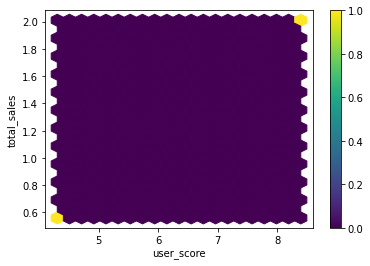

In [63]:
corfunc2('Wii', 'user_score')

# Interim Conclusion

Few correlations found between user score / critic score and the platforms under consideration. They were, however, quite moderate.


### WiiU

moderate positive connection had found between WiiU sales and critic score.
correlation value: 0.37.

moderate positive connection had found between WiiU sales and user score.
corrlation value: x.40

### X360

moderate positive connection had found between X360 sales and critic score.
correlation value: 0.52.

no connection had found between X360 sales and user score/
correlation value: -0.13.

### PS4

moderate positive connection had found between PS4 sales and critic score.
correlation value: 0.4.

weak negative connection had found between PS4 sales and user score/
correlation value: -0.04.

### XOne

moderate positive connection had found between XOne sales and critic score.
correlation value: 0.42.

weak negative connection had found between XOne sales and user score/
correlation value: -0.07.

### Wii

Wii and user score have a complete positive correlation.
The correlation coefficient is: 1.
There appears to be a complete relationship between the two variables: the user rating influences the Wii platform's sales cycles: the higher the rating, the higher the sales.

# Conclusion

Four out of five platforms had positive and moderate correlations between critic score and platform sales.

These platforms have roughly the same correlations, with values ranging from 0.37 to 0.52.

X360 has the highest correlation of the four platforms, with a 0.42.

When it comes to purchasing a game, the gaming public appears to consider critics opinions.

There were no significant correlations found between user scores and total sales on either platform , except WiiU sales and user's score:
The corrlation value 0.4.
When it comes to purchasing games for the WiiU, users do take user ratings into consideration.

Because Wii platform games lack critic scores, it is impossible to investigate the relationship between these two variables.
Despite this, a complete positive correlation between user score and Wii sales was discovered.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice hexagonal binning plots. Also regular scatter plots could be used here. 


<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>
    
Thank you Demitrii,

I updated the correlation findings based on data masking From 2012 onwards.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Great, that is indeed a very important step in the analysis, but as I mentioned in my opinion it is even better to use only last 3-4 years.

# Analyzing the top 5 platformers games - which metric should we use?

When determining which platforms are the most successful, we must first determine which metric we will employ: Is total sales or average sales used?

I decided to go with the average sales.

Total sales will reflect all games sold between 2011 and 2016. This index has the disadvantage of not reflecting current market trends. For example, games that were popular in the past but are no longer so, or genres that were popular in the past but are no longer so.

In contrast, by using average sales, I get a more accurate analytical picture of the market situation by the end of 2016, which takes into account changing trends over the past 5 years..

In [64]:
na_total=df_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na_total

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


In [65]:
na_mean=df_new.groupby(['platform'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False).head()
na_mean

,platform,na_sales
9,XOne,0.356447
7,WiiU,0.265205
3,PS4,0.262261
8,X360,0.254955
6,Wii,0.189091


In [66]:
jp_total=df_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_total

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


In [67]:
jp_mean=df_new.groupby(['platform'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_mean

,platform,jp_sales
0,3DS,0.208679
7,WiiU,0.100137
2,PS3,0.051233
5,PSV,0.049288
3,PS4,0.039947


In [68]:
eu_total=df_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_total

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


In [69]:
eu_mean=df_new.groupby(['platform'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_mean

,platform,eu_sales
3,PS4,0.345851
6,Wii,0.235455
9,XOne,0.202851
7,WiiU,0.180137
8,X360,0.139550


In [70]:
combine=df_new.groupby(['platform'])['na_sales','jp_sales','eu_sales'].mean().reset_index()
combine

/tmp/ipykernel_48/4252088814.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combine=df_new.groupby(['platform'])['na_sales','jp_sales','eu_sales'].mean().reset_index()


,platform,na_sales,jp_sales,eu_sales
0,3DS,0.106792,0.208679,0.076038
1,PC,0.047881,0.000000,0.119007
2,PS3,0.100685,0.051233,0.116621
3,PS4,0.262261,0.039947,0.345851
4,PSP,0.000000,0.027692,0.000000
5,PSV,0.008542,0.049288,0.011966
6,Wii,0.189091,0.000000,0.235455
7,WiiU,0.265205,0.100137,0.180137
8,X360,0.254955,0.000721,0.139550
9,XOne,0.356447,0.001404,0.202851


In [71]:
# I chose the rank () method over the merge () method because 'outer' merging
# generated NaN cells that do not recognized all region ranks.

combine["rank"] = combine['na_sales'].rank(ascending=False)
#combine.sort_values(by='platform', ascending=True)
combine = combine.sort_values(by="rank", ignore_index=True)
combine

,platform,na_sales,jp_sales,eu_sales,rank
0,XOne,0.356447,0.001404,0.202851,1.0
1,WiiU,0.265205,0.100137,0.180137,2.0
2,PS4,0.262261,0.039947,0.345851,3.0
3,X360,0.254955,0.000721,0.139550,4.0
4,Wii,0.189091,0.000000,0.235455,5.0
5,3DS,0.106792,0.208679,0.076038,6.0
6,PS3,0.100685,0.051233,0.116621,7.0
7,PC,0.047881,0.000000,0.119007,8.0
8,PSV,0.008542,0.049288,0.011966,9.0
9,PSP,0.000000,0.027692,0.000000,10.0


----------------------------------
Top 5 platforms in north america (average sales):


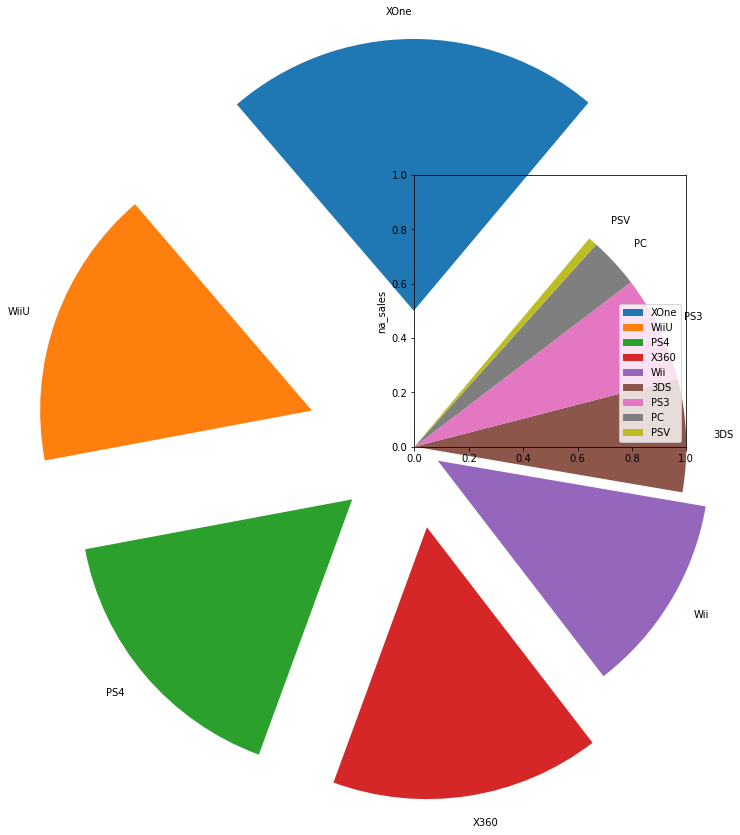

In [72]:
# pie chart that would illustrae na average sales by platforms
# The pieces that stand out from the pie represent the leading platforms.
# Sorry if the placement of plt.legend appears inconvenient; I tried my best not to obstruct the view.

na_labels = ["XOne","WiiU","PS4","X360","Wii","3DS","PS3","PC","PSV","PSP"]
myexplode = [0.5, 0.4, 0.3, 0.3, 0.1, 0, 0, 0, 0, 0]

combine.plot(y='na_sales', kind='pie', labels = na_labels, figsize=(5, 5), startangle = 50, frame=True, explode = myexplode)
print('----------------------------------')
print('Top 5 platforms in north america (average sales):')
plt.legend(loc=4)
plt.show()

### Top 5 platforms in North America

#### XOne, WiiU, PS4, X360 & Wii are the top platform in North America in terms of average sales.
    
    1. In North America, XOne is the top platform in terms of average sales.
    2. WiiU ranked 2nd in average sales , but not in total sales.
    3. The PS4 ranked 3nd in average sales, but 1st in toal sales.
    4. X360 is fourth in average sales and 3rd in total sales.
    5. Wii ranked 5th in average sales total sales.
    
    When it comes to the leading platforms, a comparison of sales averages and total sales in North America reveals a very   
    different picture:
    In terms of total sales, the PS4 is the leading platform, with the 3DS and PS3 making the top five.
        In terms of average sales, the XOne is the leading platform, while the 3DS and PS3 give way to the Wii and WiiU in the top five.

In [73]:
# I chose the rank () method over the merge () method because 'outer' merging
# generated NaN cells that do not recognized all region ranks.

combine["rank"] = combine['jp_sales'].rank(ascending=False)
combine.sort_values(by='platform', ascending=True)
combine = combine.sort_values(by="rank", ignore_index=True)
combine

,platform,na_sales,jp_sales,eu_sales,rank
0,3DS,0.106792,0.208679,0.076038,1.0
1,WiiU,0.265205,0.100137,0.180137,2.0
2,PS3,0.100685,0.051233,0.116621,3.0
3,PSV,0.008542,0.049288,0.011966,4.0
4,PS4,0.262261,0.039947,0.345851,5.0
5,PSP,0.000000,0.027692,0.000000,6.0
6,XOne,0.356447,0.001404,0.202851,7.0
7,X360,0.254955,0.000721,0.139550,8.0
8,Wii,0.189091,0.000000,0.235455,9.5
9,PC,0.047881,0.000000,0.119007,9.5


----------------------------------
Top 5 platforms in Japan(average sales):


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


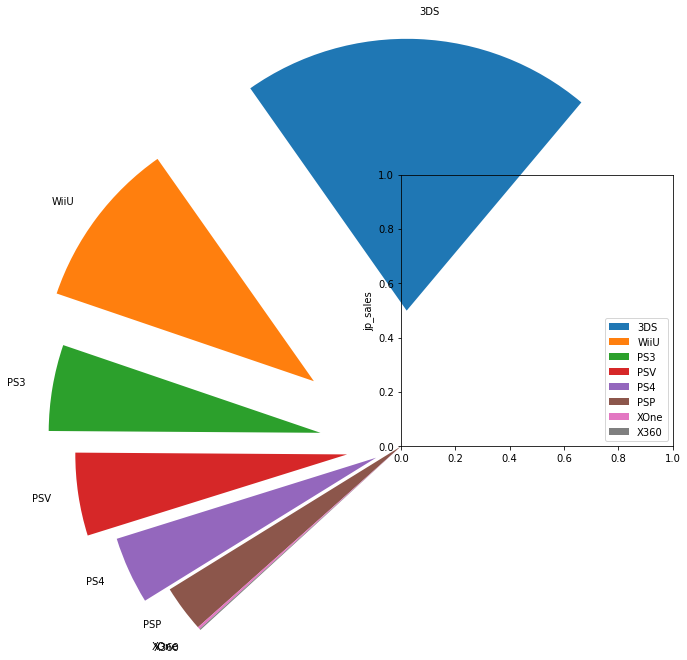

In [74]:
# pie chart that would illustrae jp average sales by platforms
# The pieces that stand out from the pie represent the leading platforms.
# Sorry if the placement of plt.legend appears inconvenient; I tried my best not to obstruct the view.

jp_labels = ["3DS","WiiU","PS3","PSV","PS4","PSP","XOne","X360","Wii","PC"]
myexplode = [0.5, 0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0]

combine.plot(y='jp_sales', kind='pie', labels = jp_labels, figsize=(5, 5), startangle = 50, frame=True, explode = myexplode)
print('----------------------------------')
print('Top 5 platforms in Japan(average sales):')
plt.show
plt.legend(loc=4)

### Top 5 platforms in Japan

#### 3DS, DS, WiiU, PS3 & PSV are the top 5 platforms in terms of average sales
    
    1. In Japan, 3DS is the top platform in terms of total and average sales.
    3. WiiU ranked 2nd in average sales and 5th in total sales.
    4. PS3 ranked 3rd in average sales and 4th in total sales.
    5. PSV ranked 4th in average sales and 3rd in total sales
    6. PS4 ranked 5th in aveerage sales but 2nd in total sales.
    
    A comparison of sales averages and total sales in Japan reveals a significant impact on the WiiU and PS4 platforms.
    While the WiiU ranks second in terms of average sales, it ranks fifth in terms of total sales.
    Similarly, the PS4 ranks second in total sales but fifth in average sales.    

In [75]:
# I chose the rank () method over the merge () method because 'outer' merging
# generated NaN cells that do not recognized all region ranks.

combine["rank"] = combine['eu_sales'].rank(ascending=False)
# combine.sort_values(by='platform', ascending=True)
combine = combine.sort_values(by="rank", ignore_index=True)
combine

,platform,na_sales,jp_sales,eu_sales,rank
0,PS4,0.262261,0.039947,0.345851,1.0
1,Wii,0.189091,0.000000,0.235455,2.0
2,XOne,0.356447,0.001404,0.202851,3.0
3,WiiU,0.265205,0.100137,0.180137,4.0
4,X360,0.254955,0.000721,0.139550,5.0
5,PC,0.047881,0.000000,0.119007,6.0
6,PS3,0.100685,0.051233,0.116621,7.0
7,3DS,0.106792,0.208679,0.076038,8.0
8,PSV,0.008542,0.049288,0.011966,9.0
9,PSP,0.000000,0.027692,0.000000,10.0


----------------------------------
Top 5 platforms in Europe (average sales):


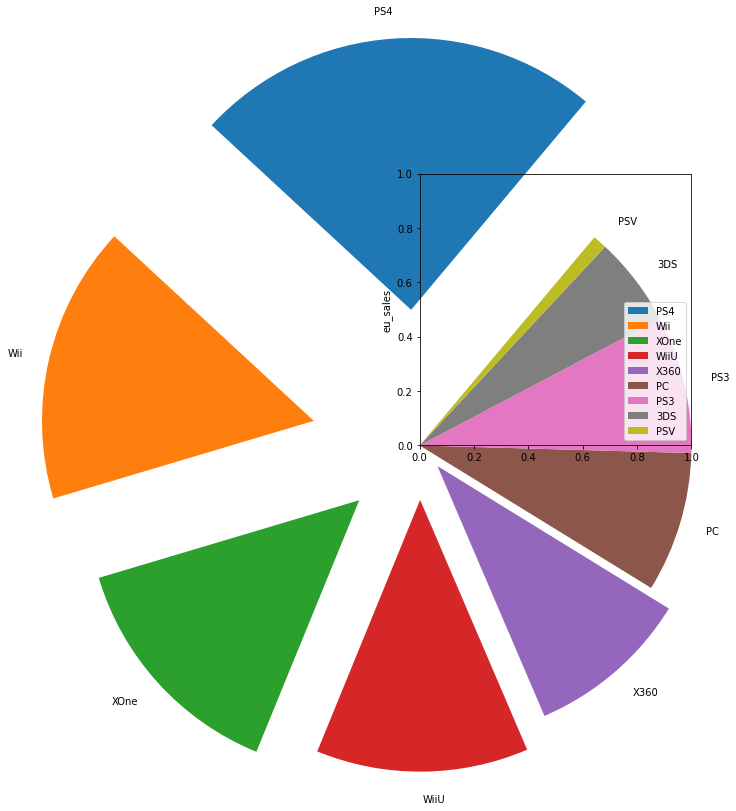

In [76]:
# pie chart that would illustrae eu average sales by platforms
# The pieces that stand out from the pie represent the leading platforms.
# Sorry if the placement of plt.legend appears inconvenient; I tried my best not to obstruct the view.

eu_labels = ["PS4","Wii","XOne","WiiU","X360","PC","PS3","3DS","PSV","PSP"]
myexplode = [0.5, 0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0]

combine.plot(y='eu_sales', kind='pie', labels = eu_labels, figsize=(5, 5), startangle = 50, frame=True, explode = myexplode)
print('----------------------------------')
print('Top 5 platforms in Europe (average sales):')
plt.show
plt.legend(loc=4)

### Which are the top five platforms in Europe?

#### PS4 , Wii, XOne, WiiU & X360 are the tope platforms in terms of average sales.
    
    1. In Europe, the PS4 is the most popular platform in terms of average and total sales.
    2. In terms of average sales, Wii is the second most popular platform, but not in total sales.
    3. XOne ranked 3rd in terms of average sales and 2nd in total sales.
    4. WiiU ranked fourth in terms of average sales, but not in terms of total sales.
    5. X360 ranked 5th in terms of average sales, but not in terms of total sales.
    
    On average, the leading platforms in Europe express themselves very differently than total sales.

    In terms of average and total sales, the PlayStation 4 is the leading platform in Europe.

    The PS3, PC, and 3DS join the top five in total sales.
    Despite this, the Wii, Wiiu, and X360 trade places in the top five of the sales average.   

# Top 5 genres

In [77]:
combine_geners=df_new.groupby(['genre'])['na_sales','jp_sales','eu_sales'].mean().reset_index()
combine_geners.sort_values(by='eu_sales', ascending=False)

/tmp/ipykernel_48/4129003898.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combine_geners=df_new.groupby(['genre'])['na_sales','jp_sales','eu_sales'].mean().reset_index()


,genre,na_sales,jp_sales,eu_sales
8,Shooter,0.617344,0.038047,0.511875
10,Sports,0.286522,0.020248,0.284037
6,Racing,0.126667,0.025507,0.204783
4,Platform,0.178684,0.070789,0.178947
9,Simulation,0.059773,0.052500,0.165909
7,Role-Playing,0.151448,0.140995,0.127466
0,Action,0.117173,0.047787,0.120646
3,Misc,0.133186,0.049646,0.113805
2,Fighting,0.207167,0.106167,0.111500
11,Strategy,0.026486,0.025676,0.048378


In [78]:
combine_geners["rank"] = combine_geners['na_sales'].rank(ascending=False)
#combine_geners.sort_values(by='genre', ascending=False)
combine_geners = combine_geners.sort_values(by="na_sales", ascending=False)
combine_geners

,genre,na_sales,jp_sales,eu_sales,rank
8,Shooter,0.617344,0.038047,0.511875,1.0
10,Sports,0.286522,0.020248,0.284037,2.0
2,Fighting,0.207167,0.106167,0.111500,3.0
4,Platform,0.178684,0.070789,0.178947,4.0
7,Role-Playing,0.151448,0.140995,0.127466,5.0
3,Misc,0.133186,0.049646,0.113805,6.0
6,Racing,0.126667,0.025507,0.204783,7.0
0,Action,0.117173,0.047787,0.120646,8.0
9,Simulation,0.059773,0.052500,0.165909,9.0
5,Puzzle,0.046429,0.066429,0.037143,10.0


<AxesSubplot:xlabel='na_sales', ylabel='genre'>

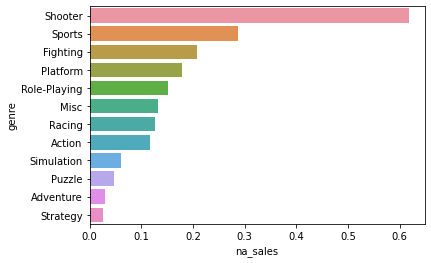

In [79]:
sns.barplot(x='na_sales', y='genre', data=combine_geners)

Geners mean sales by region: na_sales    0.165114
jp_sales    0.055271
eu_sales    0.161631
rank        6.500000
dtype: float64
Geners std sales by region: na_sales    0.162008
jp_sales    0.036887
eu_sales    0.132054
rank        3.605551
dtype: float64


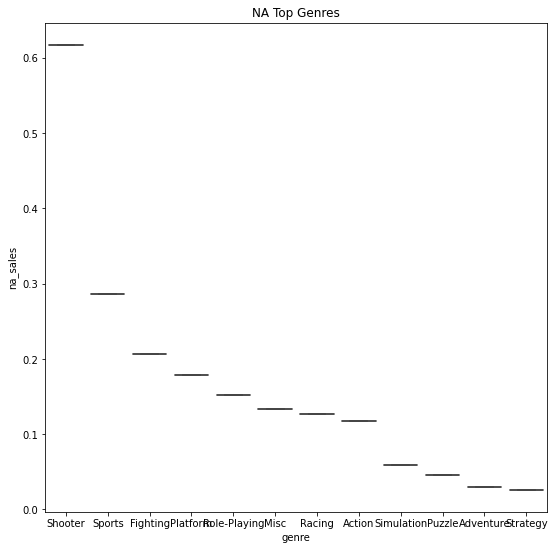

In [80]:
plt.figure(figsize=(9,9))
genres_boxplots=sns.boxplot(x=combine_geners['genre'], y=combine_geners['na_sales'], data=combine_geners, showfliers = False)


genres_boxplots
genres_boxplots.set_title('NA Top Genres')
print('Geners mean sales by region:', combine_geners.mean())
print('Geners std sales by region:', combine_geners.std())
plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Great that you also checked mean sales per genre. However, can you please additionally create a boxplot with mean sales per genre. Boxplot helps a lot to see outliers in the data and why we see such discrepancy. 

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>
    
I did my best to make an informative boxplot. I'm not sure it serves the purpose: the standard deviations of the various areas are in zero range, which is probably why we can't see the boxplot parts clearly.
If this isn't enough, I'd appreciate it if you could give me another hint or a link to a site/article where I can create more informative boxplots.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2:</b>

You can also add a regular boxplot here, as below

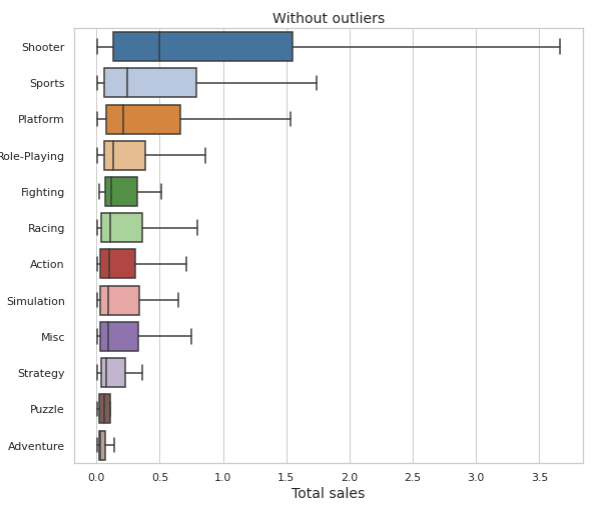

# The top five Geners in north america

1 . In North America, the 'shooter' genre has the highest average sales.

This finding is not surprising in the context of North America. The right to bear arms for self-defense is enshrined in the Constitution of the United States, the most populated state in North America.

Furthermore, the US is a significant exporter of weapons and cultural products that "sanctify" constitutional values. It's not surprising that weapons are deeply engrained in American culture.

2 . 'Sports' games are the second best-selling type of game in North America

3 . 'Fighting' games ranked 3rd place as the best selling genre.

3 . 'Platform' games ranked 4th.

3 . 'Role Playing' games ranked 5th.

In [81]:
combine_geners["rank"] = combine_geners['jp_sales'].rank(ascending=False)
#combine_geners.sort_values(by='genre', ascending=False)
combine_geners = combine_geners.sort_values(by="jp_sales", ascending=False)
combine_geners

,genre,na_sales,jp_sales,eu_sales,rank
7,Role-Playing,0.151448,0.140995,0.127466,1.0
2,Fighting,0.207167,0.106167,0.111500,2.0
4,Platform,0.178684,0.070789,0.178947,3.0
5,Puzzle,0.046429,0.066429,0.037143,4.0
9,Simulation,0.059773,0.052500,0.165909,5.0
3,Misc,0.133186,0.049646,0.113805,6.0
0,Action,0.117173,0.047787,0.120646,7.0
8,Shooter,0.617344,0.038047,0.511875,8.0
11,Strategy,0.026486,0.025676,0.048378,9.0
6,Racing,0.126667,0.025507,0.204783,10.0


<AxesSubplot:xlabel='jp_sales', ylabel='genre'>

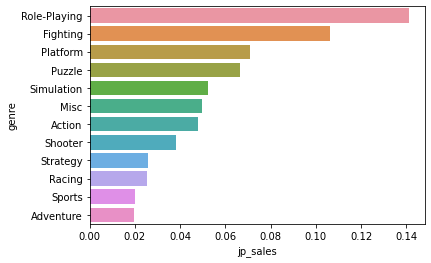

In [82]:
sns.barplot(x='jp_sales', y='genre', data=combine_geners)

Geners mean sales by region: na_sales    0.165114
jp_sales    0.055271
eu_sales    0.161631
rank        6.500000
dtype: float64
Geners std sales by region: na_sales    0.162008
jp_sales    0.036887
eu_sales    0.132054
rank        3.605551
dtype: float64


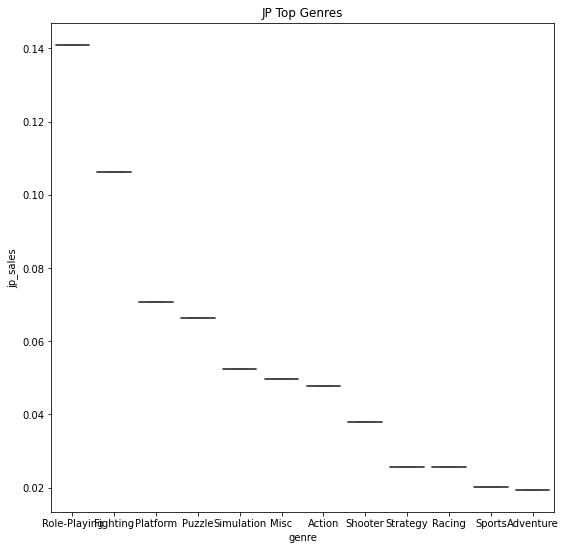

In [83]:
plt.figure(figsize=(9,9))
genres_boxplots=sns.boxplot(x=combine_geners['genre'], y=combine_geners['jp_sales'], data=combine_geners, showfliers = False)


genres_boxplots
genres_boxplots.set_title('JP Top Genres')
print('Geners mean sales by region:', combine_geners.mean())
print('Geners std sales by region:', combine_geners.std())
plt.show()

# The top five Geners in Japan

1 . Role-playing video games have a long history in Japan. In Japan, video games are also a significant industry. Arcade culture has a big influence on young Japanese people.

Role-playing games developed in Japan first appeared in the 1980s. It wasn't until the late 1980s that role-playing video games like "Dragon Quest" and "Final Fantasy", helped popularize traditional role-playing games.

If this is the case, it is not surprising that role-playing video games remain the most popular in Japan.

2 . 'Fighting' games are the second best-selling type of game in Japan

3 . 'Platform' games ranked 3rd.

4 . 'Puzzle' games ranked 4th.

5 . 'Simulation' games ranked 5th.

In [84]:
combine_geners["rank"] = combine_geners['eu_sales'].rank(ascending=False)
#combine_geners.sort_values(by='genre', ascending=False)
combine_geners = combine_geners.sort_values(by="eu_sales", ascending=False)
combine_geners

,genre,na_sales,jp_sales,eu_sales,rank
8,Shooter,0.617344,0.038047,0.511875,1.0
10,Sports,0.286522,0.020248,0.284037,2.0
6,Racing,0.126667,0.025507,0.204783,3.0
4,Platform,0.178684,0.070789,0.178947,4.0
9,Simulation,0.059773,0.052500,0.165909,5.0
7,Role-Playing,0.151448,0.140995,0.127466,6.0
0,Action,0.117173,0.047787,0.120646,7.0
3,Misc,0.133186,0.049646,0.113805,8.0
2,Fighting,0.207167,0.106167,0.111500,9.0
11,Strategy,0.026486,0.025676,0.048378,10.0


<AxesSubplot:xlabel='eu_sales', ylabel='genre'>

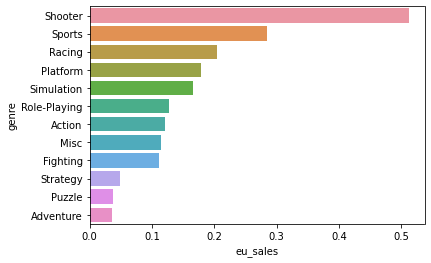

In [85]:
sns.barplot(x='eu_sales', y='genre', data=combine_geners)

Geners mean sales by region: na_sales    0.165114
jp_sales    0.055271
eu_sales    0.161631
rank        6.500000
dtype: float64
Geners std sales by region: na_sales    0.162008
jp_sales    0.036887
eu_sales    0.132054
rank        3.605551
dtype: float64


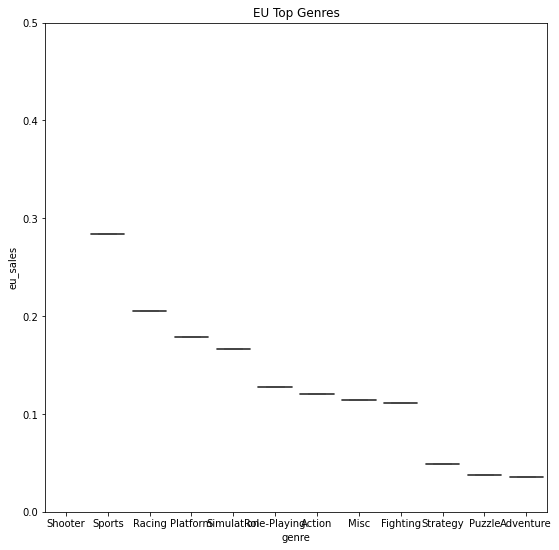

In [86]:
plt.figure(figsize=(9,9))
genres_boxplots=sns.boxplot(x=combine_geners['genre'], y=combine_geners['eu_sales'], data=combine_geners, showfliers = False)


genres_boxplots
genres_boxplots.set_title('EU Top Genres')
print('Geners mean sales by region:', combine_geners.mean())
print('Geners std sales by region:', combine_geners.std())
plt.ylim(0, 0.5)
plt.show()

# The top five Geners in Europe

1 . In Europe ,  the 'shooter' genre is taking the lead with the highest average sales.

This finding could be culturally related to the continent's collective memory of two world wars. But also to some global events that occurred between 2011 and 2016: the Iraq war, Osama bin Laden's assassination, the Boston Marathon Tragedy, and others.

It is also possible that the trend in genre preferences in North America and Europe , reflects Western cultural products that promote violence and competition, which, when combined with technological advancement at the time, made these genre more apealing.

2 . 'Sports' games are the second best-selling type of game in Europee.

3 . The'Racing', 'Platform', and 'simulation' geners ,take the last 3-5 spots, respectively.

# Top 5 games

In [87]:
combine_games=df_new.groupby(['name'])['na_sales','jp_sales','eu_sales'].mean().reset_index()
combine_games.sort_values(by='na_sales', ascending=False)

/tmp/ipykernel_48/794811700.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combine_games=df_new.groupby(['name'])['na_sales','jp_sales','eu_sales'].mean().reset_index()


,name,na_sales,jp_sales,eu_sales
599,Pokemon Omega Ruby/Pokemon Alpha Sapphire,4.350,3.10,3.490
478,Mario Kart 8,3.150,1.28,2.150
601,Pokemon Sun/Moon,2.980,2.26,1.450
768,Super Smash Bros. for Wii U and 3DS,2.935,1.62,1.225
350,Halo 5: Guardians,2.780,0.03,1.270
...,...,...,...,...
242,Ebikore Photo Kano Kiss,0.000,0.03,0.000
562,OZMAFIA!! -vivace-,0.000,0.03,0.000
561,Norn + Nonette: Last Era,0.000,0.01,0.000
560,Norn + Nonette: Act Tune,0.000,0.01,0.000


In [88]:
# I did my best to visually describe the top games, either with a graph or a curve.
# Unfortunately, due to the large number of data points, the graph is not informative enough.
# If there is a need to add visualization, I would appreciate a tip or hint; I appreciate every learning opportunity.

combine_games["rank"] = combine_games['na_sales'].rank(ascending=False)
#combine_geners.sort_values(by='genre', ascending=False)
combine_games = combine_games.sort_values(by="na_sales", ascending=False)
combine_games

,name,na_sales,jp_sales,eu_sales,rank
599,Pokemon Omega Ruby/Pokemon Alpha Sapphire,4.350,3.10,3.490,1.0
478,Mario Kart 8,3.150,1.28,2.150,2.0
601,Pokemon Sun/Moon,2.980,2.26,1.450,3.0
768,Super Smash Bros. for Wii U and 3DS,2.935,1.62,1.225,4.0
350,Halo 5: Guardians,2.780,0.03,1.270,5.0
...,...,...,...,...,...
242,Ebikore Photo Kano Kiss,0.000,0.03,0.000,713.5
562,OZMAFIA!! -vivace-,0.000,0.03,0.000,713.5
561,Norn + Nonette: Last Era,0.000,0.01,0.000,713.5
560,Norn + Nonette: Act Tune,0.000,0.01,0.000,713.5


   # Top 5 games in North America
   ### 1.Pokemon Omega Ruby/Pokemon Alpha Sapphire
   In North America , "Pokemon Omega Ruby/Pokemon Alpha Sapphire" is the best-selling game , with average sales of 4.35 million dollars.

   The revenue generated by the game in North America has the highest score. However, it is significantly less popular in    
   Europe and Japan. (3.49 & 3.1 million dollars, respectively).
    

   ### 2. Mario Kart 8
   Mario Kart 8 is the second best-selling game in North America, with an average of 3.15 million dollars.
    
   North America has the highest revenue from the game, while Japan and Europe are far behind (1.28 & 2.15 million    
   dollars, respectively).
   
   
   ### 3. Pokemon Sun/Moon
   Pokemon Sun/Moon ranked 3rd in North America in terms of average sales, earning 2.98 million dollars. It earned 1.45   
   million dollars in Europe and 2.26 million dollars in Japan.
   
   
   ### 4.Super Smash Bros. for Wii U and 3DS	
   Super Smash Bros. for Wii U and 3DS ranked 4th with an average of 2.93 million dollars revenue.
   This is the highest revenue generated by the game on a global scale.
   
   ### 5.Halo 5: Guardians	
   Halo 5: Guardians ranked fifth in North America with an average of 2.78 million dollars revenue.
   
   North America has the highest revenue rate, followed by Europe and Japan (1.27 and 0.03 million dollars, respectively).

In [89]:
# I did my best to visually describe the top games, either with a graph or a curve.
# Unfortunately, due to the large number of data points, the graph is not informative enough.
# If there is a need to add visualization, I would appreciate a tip or hint; I appreciate every learning opportunity.

combine_games["rank"] = combine_games['jp_sales'].rank(ascending=False)
#combine_geners.sort_values(by='genre', ascending=False)
combine_games = combine_games.sort_values(by="jp_sales", ascending=False)
combine_games

,name,na_sales,jp_sales,eu_sales,rank
938,Yokai Watch 2 Ganso/Honke,0.090000,3.18,0.000,1.0
599,Pokemon Omega Ruby/Pokemon Alpha Sapphire,4.350000,3.10,3.490,2.0
513,Monster Hunter X,0.270000,2.79,0.210,3.0
939,Yokai Watch 2 Shinuchi,0.000000,2.68,0.000,4.0
510,Monster Hunter 4 Ultimate,0.680000,2.62,0.480,5.0
...,...,...,...,...,...
705,Sherlock Holmes: Crimes & Punishments,0.036000,0.00,0.056,818.0
52,Assassin's Creed The Ezio Collection,0.035000,0.00,0.085,818.0
458,MLB 14: The Show,0.336667,0.00,0.000,818.0
19,Act of Aggression,0.000000,0.00,0.010,818.0


# Top 5 games in Japan

## 1.Yokai Watch 2 Ganso/Honke

   "Yokai Watch 2 Ganso/Honke" is the best-selling game in Japan, with average sales of 3.18 million.
    The revenue generated by the game in Japan has the highest score. However, the game earned 0.09 million in North America       while earning nothing in Europe.
 
## 2. Pokemon Omega Ruby/Pokemon Alpha Sapphire

   As previously stated in the North American findings , Pokemon Omega Ruby/Pokemon Alpha Sapphire ranked second in Japan in 
   terms of average revenue, with 3.1 million dollars.
    
   In North America, however, the game generated an average revenue of 4.35 million 
   dollars.
    
   The game earned an average of 3.49 million dollars in Europe.
   This discovery is an eye-catching example of a Japanese product that is far more successful outside of Japan.
   
## 3. Monster Hunter X

   "Monster Hunter X" is the third best-selling game in Japan, with average sales of 2.79 million.
   The game earned 0.27 million in North America and 0.21 million in Europe.
   
## 4.Yokai Watch 2 Shinuchi

   With sales of 2.68 million, the "Yokai Watch 2 Shinuchi" game ranked fourth in Japan's average revenue.
   
   In America and Europe, on the other hand, the game made no money.

   This discovery is an example of a game that is only played in one region and not in others.

## 5.Monster Hunter 4 Ultimate

   With 2.62 million dollars in average revenue, Monster Hunter 4 Ultimate is ranked fifth in Japan. It also has the     
   highest revenue average of the regions surveyed.
   
   The average revenue in North America is 0.68 million dollars, while the average revenue in Europe is 0.48 million dollars.

In [90]:
# I did my best to visually describe the top games, either with a graph or a curve.
# Unfortunately, due to the large number of data points, the graph is not informative enough.
# If there is a need to add visualization, I would appreciate a tip or hint; I appreciate every learning opportunity.

combine_games["rank"] = combine_games['eu_sales'].rank(ascending=False)
#combine_geners.sort_values(by='genre', ascending=False)
combine_games = combine_games.sort_values(by="eu_sales", ascending=False)
combine_games

,name,na_sales,jp_sales,eu_sales,rank
599,Pokemon Omega Ruby/Pokemon Alpha Sapphire,4.350000,3.100000,3.490000,1.0
328,Grand Theft Auto V,2.386667,0.126667,3.063333,2.0
889,Uncharted 4: A Thief's End,1.850000,0.190000,2.500000,3.0
256,FIFA 16,0.610000,0.022000,2.218000,4.0
478,Mario Kart 8,3.150000,1.280000,2.150000,5.0
...,...,...,...,...,...
62,Atelier Firis: The Alchemist of the Mysterious...,0.000000,0.025000,0.000000,729.5
488,Mega Man Legacy Collection,0.105000,0.025000,0.000000,729.5
356,Harukanaru Toki no Naka de 6,0.000000,0.025000,0.000000,729.5
557,Nobunaga's Ambition: Sphere of Influence,0.015000,0.025000,0.000000,729.5


# Top 5 games in Europe

## 1. Pokemon Omega Ruby/Pokemon Alpha Sapphire

  Pokemon Omega Ruby/Pokemon Alpha Sapphire has the highest average revenue in Europe, with 3.49 million dollars.
  
  With 4.35 million dollars, it is ranked second in the region after North America.
  
  In Japan, however, the game was the least successful , grossing 3.1 million dollars.

## Grand Theft Auto V

  "Grand Theft Auto V" is the second best-selling game in Europe, with 3.06 million dollars in revenue.it also ranks 1st in    
  region.

## Uncharted 4: A Thief's End

  With an average revenue of 3.49 million dollars, "Uncharted 4: A Thief's End" is Europe's 3rd best-   
  selling   game.
  
  It is ranked 1st in region.
  In japan the game earn 1.9 million, while North America comes in third place, with an average revenue     
  of 1.85 million dollars.
  
  
## FIFA 16
  
  With an average revenue of $ 3.140 million, FIFA 16 is the 4th best-selling game in Europe.
  
  The game ranked first in region.
  
  North America is second in the world in terms of game revenue, but by a huge margin: 0.61 million.

  With 0.02 million, Japan ranks third in the region in terms of revenue.
  
    
## Mario Kart 8

   Mario Kart 8 is the 5th bea-selling game in europe, with an average revenue of 2.15 million dollars.
   
   it is ranked second in the region after North America (3.15), while Japan ranks third and last with 1.28 million.

# is ESRB effect sales ?

In [91]:
na_rating_sum=df_new.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
print(na_rating_sum)

    rating  na_sales
2        M     96.42
4  unknown     64.72
0        E     50.74
3        T     38.95
1     E10+     33.23


In [92]:
na_rating_mean=df_new.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False)
print(na_rating_mean)

    rating  na_sales
2        M  0.363849
0        E  0.231689
1     E10+  0.179622
3        T  0.143727
4  unknown  0.086409


----------------------------------


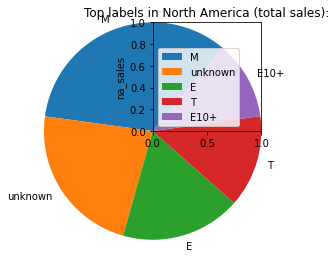

----------------------------------


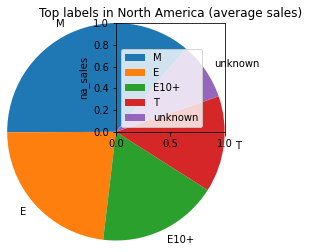

In [93]:
rating_labels_sum = ["M","unknown","E","T","E10+"]
myexplode = [0, 0, 0, 0, 0]
rating_labels_mean = ["M","E","E10+","T","unknown"]
myexplode2 = [0, 0, 0, 0, 0]

na_rating_sum.plot(y='na_sales', kind='pie', labels = rating_labels_sum, figsize=(2, 2), startangle = 50, frame=True, explode = myexplode)
print('----------------------------------')
plt.legend(loc=3)
plt.title('Top labels in North America (total sales):', loc='center')
plt.show()

na_rating_mean.plot(y='na_sales', kind='pie', labels = rating_labels_mean, figsize=(2, 2), startangle = 50, frame=True, explode = myexplode2)
print('----------------------------------')
plt.legend(loc=3)
plt.title('Top labels in North America (average sales)', loc='center')
plt.show()

# Interim conclusion - NA sales & Rating

### M - content that may be suitable for persons ages 17 and older. Titles in this category may contain intense violence, blood and gore, sexual content, and/or strong language.
When the distributions of average sales versus total sales in North America are compared, it is clear that games rated 'M' - lead the ranking table in both distributions , and thus have no effect on sales in North America.

### E - content of a game or app that is generally suitable for all ages, and may contain minimal cartoon, fantasy or mild violence, or infrequent use of mild language
When average sales are compared to total North American sales, it is clear that games rated 'E' are slightly less popular in terms of average sales. E-labeled games rank second in average sales and third in total sales.

### E10+ - content that is generally suitable for ages 10 and up, and may contain more cartoon, fantasy or mild violence, or minimal suggestive themes
E10+ games ranked third on average sales and 5th in total sales.

### T - content that may be suitable for ages 13 and older. Titles in this category may contain violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.
T-labeled games ranked 4th in average & total sales.

### Unknown
The game's second-place finish in total sales reflects the high distribution of unlabeled games.
When comparing average sales, unlabeled games rank fifth and last, implying that they are the least to be sold.

In [94]:
jp_rating_sum=df_new.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print(jp_rating_sum)

    rating  jp_sales
4  unknown     56.90
3        T     14.78
0        E      8.94
2        M      8.01
1     E10+      4.46


In [95]:
jp_rating_mean=df_new.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False)
print(jp_rating_mean)

    rating  jp_sales
4  unknown  0.075968
3        T  0.054539
0        E  0.040822
2        M  0.030226
1     E10+  0.024108


----------------------------------


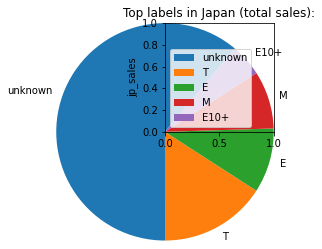

----------------------------------


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


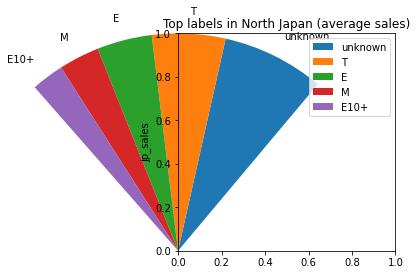

In [96]:
rating_labels_sum = ["unknown","T","E","M","E10+"]
myexplode = [0, 0, 0, 0, 0]
rating_labels_mean = ["unknown","T","E","M","E10+"]
myexplode2 = [0, 0, 0, 0, 0]

jp_rating_sum.plot(y='jp_sales', kind='pie', labels = rating_labels_sum, figsize=(2, 2), startangle = 50, frame=True, explode = myexplode)
print('----------------------------------')
plt.legend(loc=3)
plt.title('Top labels in Japan (total sales):', loc='center')
plt.show()

jp_rating_mean.plot(y='jp_sales', kind='pie', labels = rating_labels_mean, figsize=(4, 4), startangle = 50, frame=True, explode = myexplode2)
print('----------------------------------')
plt.legend(loc=1)
plt.title('Top labels in North Japan (average sales)', loc='center')
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
I can recommend to use grouped pie charts or barplots as it is the best way to show proportions. 
    
Also it is not completely correct to visualize discrete values using lineplot.

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>
    
So, instead of a linear graph, I changed the visualization to two pie charts.
Furthermore, I updated the conclusions accordingly.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Well done! That looks nice.

# Interim conclusion - JP sales & Rating

### Unknown - 
Japan presents a fascinating picture, with the best-selling games bearing an unknown label (in both average & total sales terms).

In the absence of additional data, it is difficult to determine whether these are games that were never intended to be tagged and thus are more appealing to buyers in the first place, or games where there is no data about the tagging but it exists and is expected to be updated.

Perhaps the Japanese gaming culture differs in the way buyers treat tags. Perhaps they don't consider them at all during the purchase.

### T - 
T-tagged games are ranked second in the both tables.

### E - 
In Japan, games labeled E rank third in both the total and average sales charts.

### M -
M games are ranked fourth in both the total sales and average sales charts in Japan.

### E10+
E10+ games ranked 5th in both the total sales and average sales.

In [97]:
eu_rating_sum=df_new.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
print(eu_rating_sum)

    rating  eu_sales
2        M     93.44
4  unknown     58.95
0        E     58.06
3        T     34.07
1     E10+     26.16


In [98]:
eu_rating_mean=df_new.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False)
print(eu_rating_mean)

    rating  eu_sales
2        M  0.352604
0        E  0.265114
1     E10+  0.141405
3        T  0.125720
4  unknown  0.078705


----------------------------------


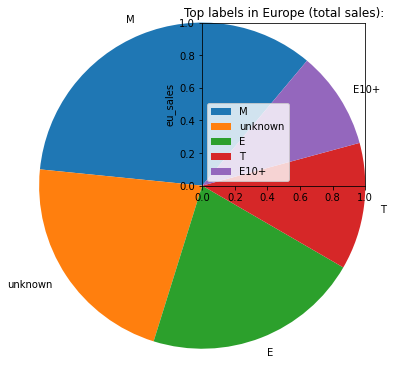

----------------------------------


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


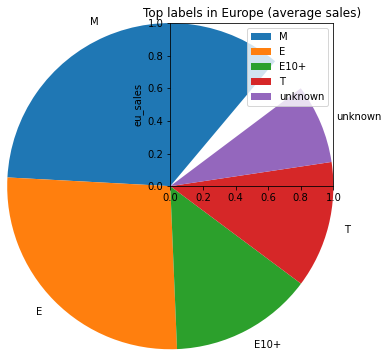

In [99]:
rating_labels_sum = ["M","unknown","E","T","E10+"]
myexplode = [0, 0, 0, 0, 0]
rating_labels_mean = ["M","E","E10+","T","unknown"]
myexplode2 = [0, 0, 0, 0, 0]

eu_rating_sum.plot(y='eu_sales', kind='pie', labels = rating_labels_sum, figsize=(3, 3), startangle = 50, frame=True, explode = myexplode)
print('----------------------------------')
plt.legend(loc=3)
plt.title('Top labels in Europe (total sales):', loc='center')
plt.show()

eu_rating_mean.plot(y='eu_sales', kind='pie', labels = rating_labels_mean, figsize=(3, 3), startangle = 50, frame=True, explode = myexplode2)
print('----------------------------------')
plt.legend(loc=1)
plt.title('Top labels in Europe (average sales)', loc='center')
plt.show()

# Interim conclusion - EU sales & Rating

### M- 
M-rated games dominate the European sales chart, both in terms of average value and total sales.

### E- 
Games labeled E are second in terms of average sales in the European sales charts.
However, they are ranked third in terms of total sales.
### E10+ - 
In Europe, games labeled E10+ rank third in terms of average sales.
In total sales, they fall to 5th place

### T -
T games rank fourth in average & total sales in Europe.

### Unknown
In terms of total sales, games with an unknown label rank second.
Simultaneously, when the European sales average is calculated, unlabeled games rank fifth and last in the sales chart.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
We also have a lot of unknowns in the rating column, especially for Japan. Can you please add it also to the graph?

I think it is a very important information in itself about the market and what rating system is used in this region.

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>

I examined the RP distribution in the rating column to determine why it is not reflected in the regional rating table.
There are three rows with ratings of type RP, two of which are NaN cells that cannot be filled. one of the cells year_of_release is from 2011.
The RP distribution does not find its expression because the data masking has been updated for 2012 and filters out missing values.

<div class="alert alert-danger">
<b>Reviewer's comment v2:</b>
    
You can fill NaN values in the rating column with any placeholder, for example 'Unknown'. In that way it will be incorporated in the overall distributions. 

Can you please update that?

<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>
    
So I finally understood what you meant by the missing values ​​in the rating column. At first I thought you meant RP values as missing values.
Sorry about that, too many hours working on the computer.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v3:</b>
    
But now it looks perfect 👏 Thank you for adding unknowns here. 

#  conclusions

Some labels have affect over game sales in North America.
Unlabeled games sell the fewest copies on average.
Games labeled E & E10+, on the other hand, sell more on average.

In Japan, on the other hand, game labels have no influence on sales cycles.
Unlabeled games are the most popular, both overall and on average.

Finally, unlabeled games have the shortest sales cycles in Europe and are the least popular.

# step 5: test the hypotheses

average user rating of the xbox and pc platforms are the same - the null hypothesis

average user rating for the action and sports are different.

In [100]:
# first steps of testing the hypotheses
gaming.platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [101]:
# creating xbox sample
xbox=gaming[(gaming.platform=='XB')&(gaming.user_score.notna())&(gaming.user_score!='tbd')]['user_score'].astype(float)
xbox

78       8.2
129      8.6
466      8.5
508      8.7
569      8.5
        ... 
16037    6.0
16157    2.7
16194    7.3
16203    3.0
16455    7.0
Name: user_score, Length: 586, dtype: float64

In [102]:
# briefly checkin the values
xbox.unique()

array([8.2, 8.6, 8.5, 8.7, 9.2, 6.7, 6.1, 9.1, 7.6, 8.9, 6.9, 7.5, 7.8,
       7.4, 7.2, 8.1, 8.8, 8.3, 7.1, 8. , 5.8, 5.1, 9. , 8.4, 7.9, 6.4,
       4.7, 5.9, 7.7, 5.7, 5.2, 7.3, 6.6, 7. , 6.5, 9.3, 5.4, 6. , 6.8,
       2.4, 4.4, 6.2, 4.3, 5.3, 2.8, 5.5, 6.3, 5. , 3. , 2. , 4.1, 4. ,
       5.6, 3.6, 0.5, 4.6, 3.4, 1.8, 2.5, 1.5, 2.7, 1.2, 3.7, 4.5, 4.8])

In [103]:
# creating pc sample
pc=gaming[(gaming.platform=='PC')&(gaming.user_score.notna())&(gaming.user_score!='tbd')]['user_score'].astype(float)
pc

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 770, dtype: float64

In [104]:
# briefly checking
pc.unique()

array([7.6, 7.3, 4. , 8.2, 9.1, 7.9, 8.1, 8. , 7.8, 3.9, 6.6, 5.9, 7.5,
       9. , 8.3, 5.6, 8.6, 4.8, 2.5, 5.3, 5.2, 8.7, 4.2, 7. , 2.2, 6. ,
       5.4, 8.4, 8.5, 6.7, 6.9, 8.9, 5.5, 6.2, 5.7, 8.8, 7.4, 6.8, 9.3,
       6.1, 6.5, 7.7, 4.5, 3.6, 3. , 6.4, 5.8, 4.7, 4.6, 2.1, 6.3, 3.7,
       5. , 3.5, 3.3, 7.1, 4.4, 3.2, 4.3, 7.2, 4.9, 3.8, 4.1, 2.9, 5.1,
       3.4, 2.8, 3.1, 9.2, 1.4, 2.4])

In [105]:
# runing the test, checking the P-value
st.ttest_ind(xbox, pc)

Ttest_indResult(statistic=5.252484942475661, pvalue=1.7410111940926608e-07)

In [106]:
st.ttest_ind(xbox, pc).pvalue<0.05

True

In [107]:
def t_ttest(sample1,sample2):
    """
    Calculate the T-test for the means of two independent samples
    
    parameters:
    argument1(array like): sample1
    argument2(array like): sample2
    
    return: P-Value
    """
    p=st.ttest_ind(sample1, sample2).pvalue
    alpha=0.05
    
    if p<alpha:
        print("We reject the null hypothesis")
        print("sample1 mean: ", sample1.mean())
        print("sample2 mean: ", sample2.mean())
    else:
        print("We can't reject the null hypothesis")
        print("sample1 mean: ", sample1.mean())
        print("sample2 mean: ", sample2.mean())

In [108]:
# Testing wether the average user rating of the xbox and pc platforms are the same:

# H(0)= The xbox and pc platforms have the same average user rating.
# H(1)= The average rating given by 'xbox' users differs from the average rating given by 'pc' users.
t_ttest(xbox, pc)

We reject the null hypothesis
sample1 mean:  7.500511945392492
sample2 mean:  7.062467532467533


## Conclusion

I reject the Null hypothesis
The average rating among 'xbox' and 'pc' users is not the same.

In [109]:
gaming.genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Unknown            2
Name: genre, dtype: int64

In [110]:
action=gaming[(gaming.genre=='Action')&(gaming.user_score.notna())&(gaming.user_score!='tbd')]['user_score'].astype(float)
action

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1830, dtype: float64

In [111]:
sports=gaming[(gaming.genre=='Sports')&(gaming.user_score.notna())&(gaming.user_score!='tbd')]['user_score'].astype(float)
sports

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16450    4.5
16518    1.4
16528    6.9
16546    9.5
16643    6.6
Name: user_score, Length: 1103, dtype: float64

In [112]:
st.ttest_ind(action, sports).pvalue

0.10406951359049141

In [113]:
# Testing wether the average user rating of the 'Action' and 'Sports' genres are the same:

# H(0): The average user ratings for the action and sports genres are the same.
# H(1): The average user ratings for action and sports genres differ.
t_ttest(action, sports)

We can't reject the null hypothesis
sample1 mean:  7.054043715846995
sample2 mean:  6.961196736174069


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You did a great job! Hypotheses have been formulated and tested correctly.
    
Great that you also showing mean values of the samples for comparison.
    
You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). In work, you accept it as True, while you do not justify your choice in any way. Here you can manually calculate variances, or use Levene's statistic test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html or Barlett's test

# Conclusion

The null hypothesis that the user rating for Action & Sports games is the same cannot be rejected.

The P-value has a higher score than alpha: (0.1040). 

This value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (alpha=0.05) indicates that our observation is not so unlikely to have occurred by chance.

Despite the fact that the samples are of varying sizes (n1=1,830, n2=1,103), their averages are very close to each other(mean1=7.05, ,mean2=6.96).

Of course, concluding that the two genres have the same average in user's scores is not enough.
We simply can't reject the null hypothesis. The genres *may* have the same average.

# Final conclusion

### Top games
The top five games differ according to region.
However, pokemon and mario kart frenchise games are the most popular in the world.

The Japanese also enjoy Pokemon games. At the same time, they play other games that are not well known or popular in North America or Europe.

### Top genres
In Europe and North America, the most popular game genres are shooting and sports.
Racing games are more popular in Japan than they are in the North America.
Japan leads the way in its joy of role-playing and puzzle games.
More simulation games should be sold in the European and Japanese markets.

### ESRB vs. Sales

The sales distribution of gaming labels in North America and Europe is similar.
Unlabeled games are the least popular.
Following them on the list are games for children aged 10+ (T) and games with the label E10+.
M and E labels are the best-selling.

In Japan, on the other hand, there is no apparent effect of labels on sales.
Actually the best selling games are unlabeled.
Games labeled E10+ are the least sold games.

### Critic & User scores vs. Sales
It appears that critic score influences game sales.
There were moderate positive correlations found between critic score and the following platforms: WiiU, X360, PS4, and XOne.

A moderately positive correlation between user score and WiiU sales was discovered.
There were no significant correlations discovered between user score and the other platforms.

A complete positive correlation has been discovered between critic score and Wii  games. It appears that the higher the critic score for a Wii product, the higher the sales of games from this platform.

### Top Platforms
The X360, PS4, XOne, Wii & WiiU are the world's best-selling platforms.

Europeans and Americans use similar platforms, but their popularity varies. whereas Japanese users use different platforms (3DS, DS).

The PS4 & WiiU are most played platforms in the world at the same time. 

### Action vs. Sports Variance
We can't rule out the possibility that the sports and action genres have the same average of user rating.
### Xbox vs. Pc Variance
Simultaneously, the hypothesis that the average of user rating for XBOX and PC is the same can be rejected.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Overall you conducted outstanding research with correct interim findings, clean code and nice visualisation.
I like your overall conclusion. It is very structured and provides insights from your analysis.



<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>
    
Hi Dimitrii,

Thanks again for your time and patience in reviewing my project.
I tried to follow your instructions and update the code accordingly.
If further correction is needed, I would appreciate it if you could leave relevant references/articles.
Thank you.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Thank you for making all corrections in your project and hopefully smth was useful along the way :) 


<div class="alert alert-block alert-info">
<b>Student answer:</b> <a class="tocSkip"></a>
    
Hello, Dmitrii.
I updated the code as well as the project conclusions.
I'm hoping that the project will be approved this time, but you know how that goes.
Thank you once more for taking the time to review the project.
Have a wonderful day.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b>

It looks perfect now :) Thank you very much for your patience and all improvements. 